<div align="right"><b>Бронников Егор ПМ-1901</b></div>

<h1 align="center"> ARMA(2,2)</h1>

### Импорт модулей

In [1]:
import pandas as pd
import numpy as np

from scipy.optimize import minimize

import matplotlib.pyplot as plt
%matplotlib inline

### Данные

In [2]:
lynx = pd.read_csv("data/lynx.csv")

In [3]:
lynx.head()

,Year,Annual number of lynx trapped
0,1821,269
1,1822,321
2,1823,585
3,1824,871
4,1825,1475


In [4]:
lynx.columns = ["year", "y"]

### Модель AR

In [5]:
lynx["y1"] = lynx["y"].shift(1)
lynx["y2"] = lynx["y"].shift(2)

In [6]:
lynx.head()

,year,y,y1,y2
0,1821,269,NaN,NaN
1,1822,321,269.0,NaN
2,1823,585,321.0,269.0
3,1824,871,585.0,321.0
4,1825,1475,871.0,585.0


In [7]:
data = lynx.dropna()

In [8]:
def mse(data, phi1, phi2, alpha):
    return np.mean((data["y"] - (alpha + phi1*data["y1"] + phi2*data["y2"]))**2)

In [9]:
func = lambda x: mse(data, x[0], x[1], x[2])

optimization = minimize(func, (1, 1, 1))

print(optimization)
phi1, phi2, alpha = optimization.x

      fun: 776676.8542801634
 hess_inv: array([[ 3.98990609e-07, -3.06466012e-07, -1.12407439e-04],
       [-3.06466012e-07,  3.99375745e-07, -1.00106437e-04],
       [-1.12407439e-04, -1.00106437e-04,  6.32028913e-01]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 56
      nit: 8
     njev: 14
   status: 0
  success: True
        x: array([ 1.15242265e+00, -6.06228992e-01,  7.10105228e+02])


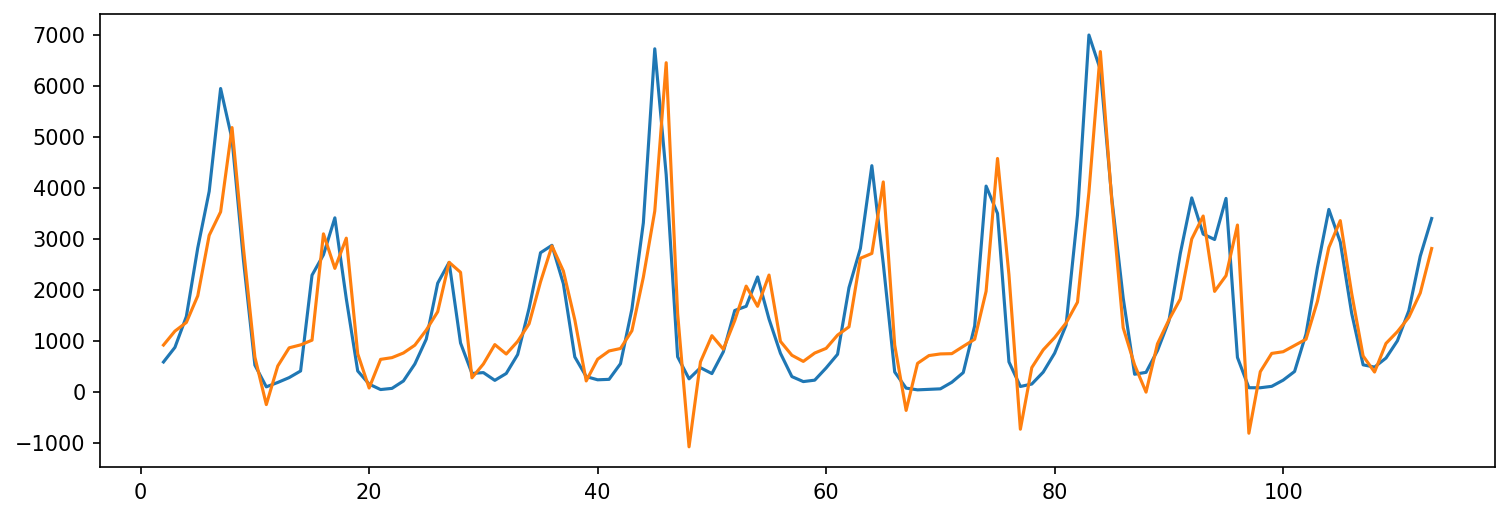

In [10]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(data["y"])
plt.plot(alpha + phi1*data["y1"] + phi2*data["y2"])
plt.show()

### Модель MA

In [12]:
ar = alpha + phi1*data["y1"] + phi2*data["y2"]

In [13]:
lynx["eps"] = data["y"] - ar

In [14]:
lynx["eps1"] = lynx["eps"].shift(1)
lynx["eps2"] = lynx["eps"].shift(2)

In [15]:
data

,year,y,y1,y2
2,1823,585,321.0,269.0
3,1824,871,585.0,321.0
4,1825,1475,871.0,585.0
5,1826,2821,1475.0,871.0
6,1827,3928,2821.0,1475.0
...,...,...,...,...
109,1930,662,485.0,529.0
110,1931,1000,662.0,485.0
111,1932,1590,1000.0,662.0
112,1933,2657,1590.0,1000.0


In [16]:
data = lynx.dropna()

In [17]:
def mse(data, theta1, theta2, alpha):
    return np.mean((data["eps"] - (alpha + theta1*data["eps1"] + theta2*data["eps2"]))**2)

In [18]:
func = lambda x: mse(data, x[0], x[1], x[2])

optimization = minimize(func, (1, 1, 1))

print(optimization)
theta1, theta2, alpha2 = optimization.x

      fun: 771098.6337729206
 hess_inv: array([[ 2.01473900e-07, -2.55730076e-07, -5.94494357e-08],
       [-2.55730076e-07,  4.71539453e-07,  3.46044034e-07],
       [-5.94494356e-08,  3.46044034e-07,  3.65449697e-06]])
      jac: array([0.1328125, 0.078125 , 0.       ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 156
      nit: 10
     njev: 39
   status: 2
  success: False
        x: array([-0.02090995, -0.14952352,  4.08577857])


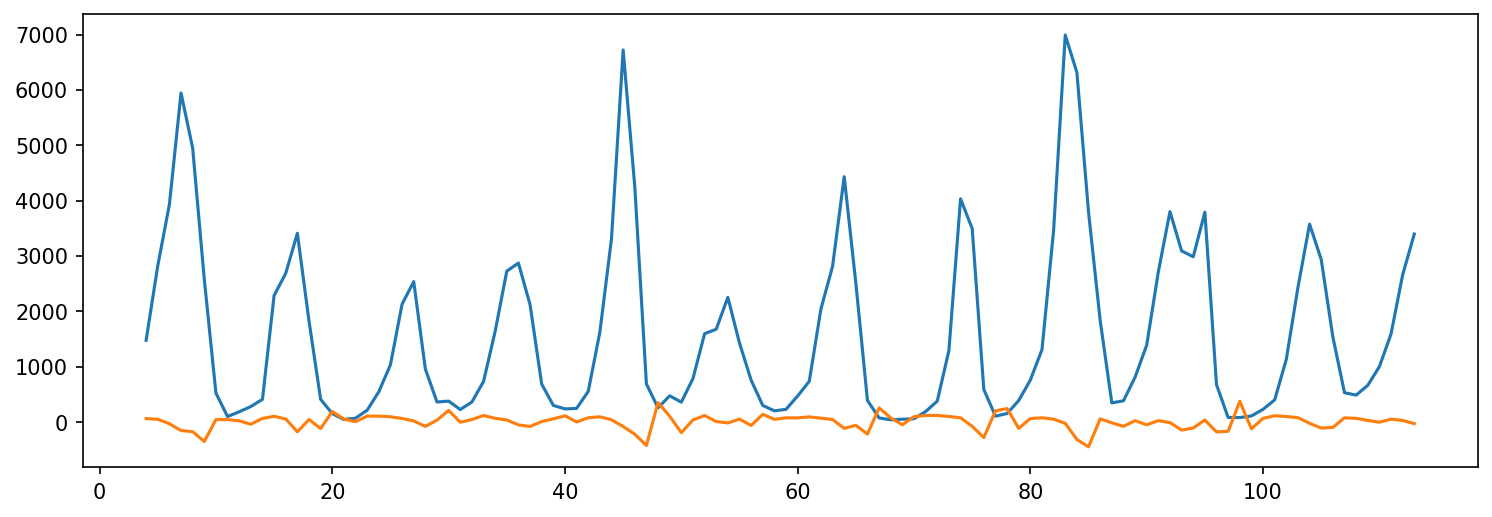

In [19]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(data["y"])
plt.plot(alpha2 + theta1*data["eps1"] + theta2*data["eps2"])
plt.show()

### Модель ARMA

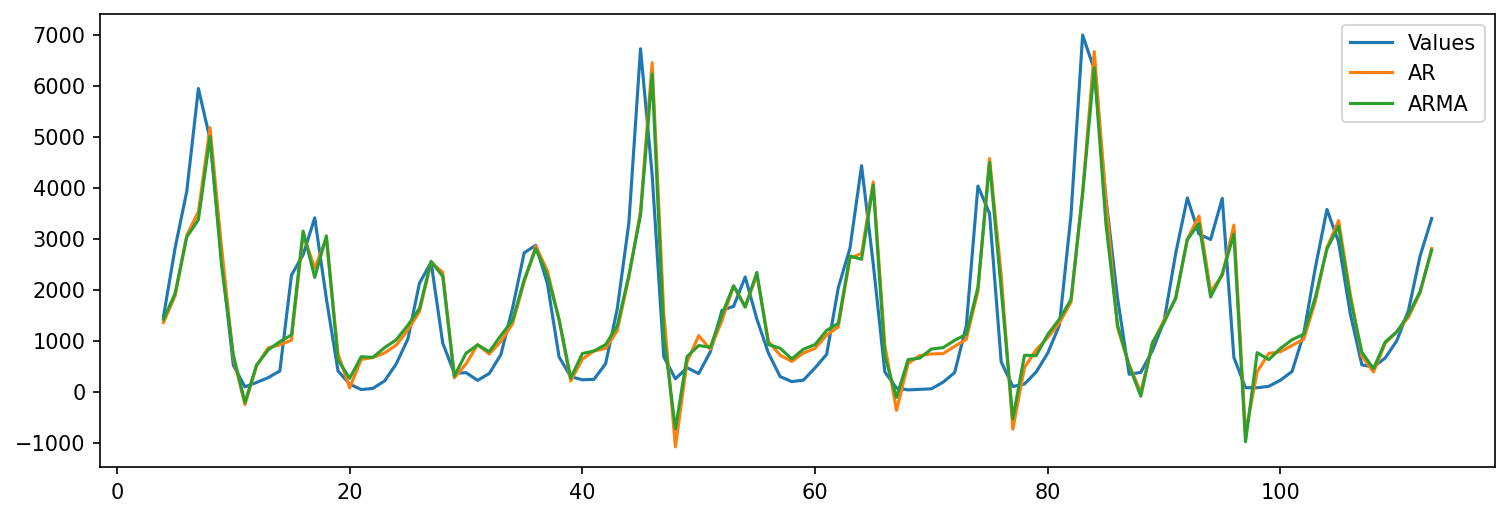

In [20]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(data["y"], label="Values")
plt.plot(alpha + phi1*data["y1"] + phi2*data["y2"], label="AR")
plt.plot((alpha+alpha2) + phi1*data["y1"] + phi2*data["y2"] + theta1*data["eps1"] + theta2*data["eps2"], label="ARMA")
plt.legend()
plt.show()

### MSE

In [21]:
arma = (alpha+alpha2) + phi1*data["y1"] + phi2*data["y2"] + theta1*data["eps1"] + theta2*data["eps2"]
mse_arma = np.mean((data["y"] - arma)**2)

In [23]:
ar = alpha + phi1*data["y1"] + phi2*data["y2"]
mse_ar = np.mean((data["y"] - ar)**2)

In [24]:
print(f"MSE ARMA: {mse_arma}")
print(f"MSE AR: {mse_ar}")
print(f"Difference: {mse_ar-mse_arma}")

MSE ARMA: 771098.6337729205
MSE AR: 788873.2688047305
Difference: 17774.63503181003
